In [9]:
%pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 451.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%config InlineBackend.figure_format = 'retina'

In [139]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

In [127]:
x_test = np.linspace(-5, 5, 100)
x_point = np.array([1.0])

K_linear_point = np.array([linear_kernel(x_point, xi) for xi in x_test])
K_polynomial_point = np.array([polynomial_kernel(x_point, xi) for xi in x_test])
K_gaussian_point = np.array([gaussian_kernel(x_point, xi) for xi in x_test])
K_gaussian_high_gamma_point = np.array([gaussian_kernel(x_point, xi, gamma=2.0) for xi in x_test])


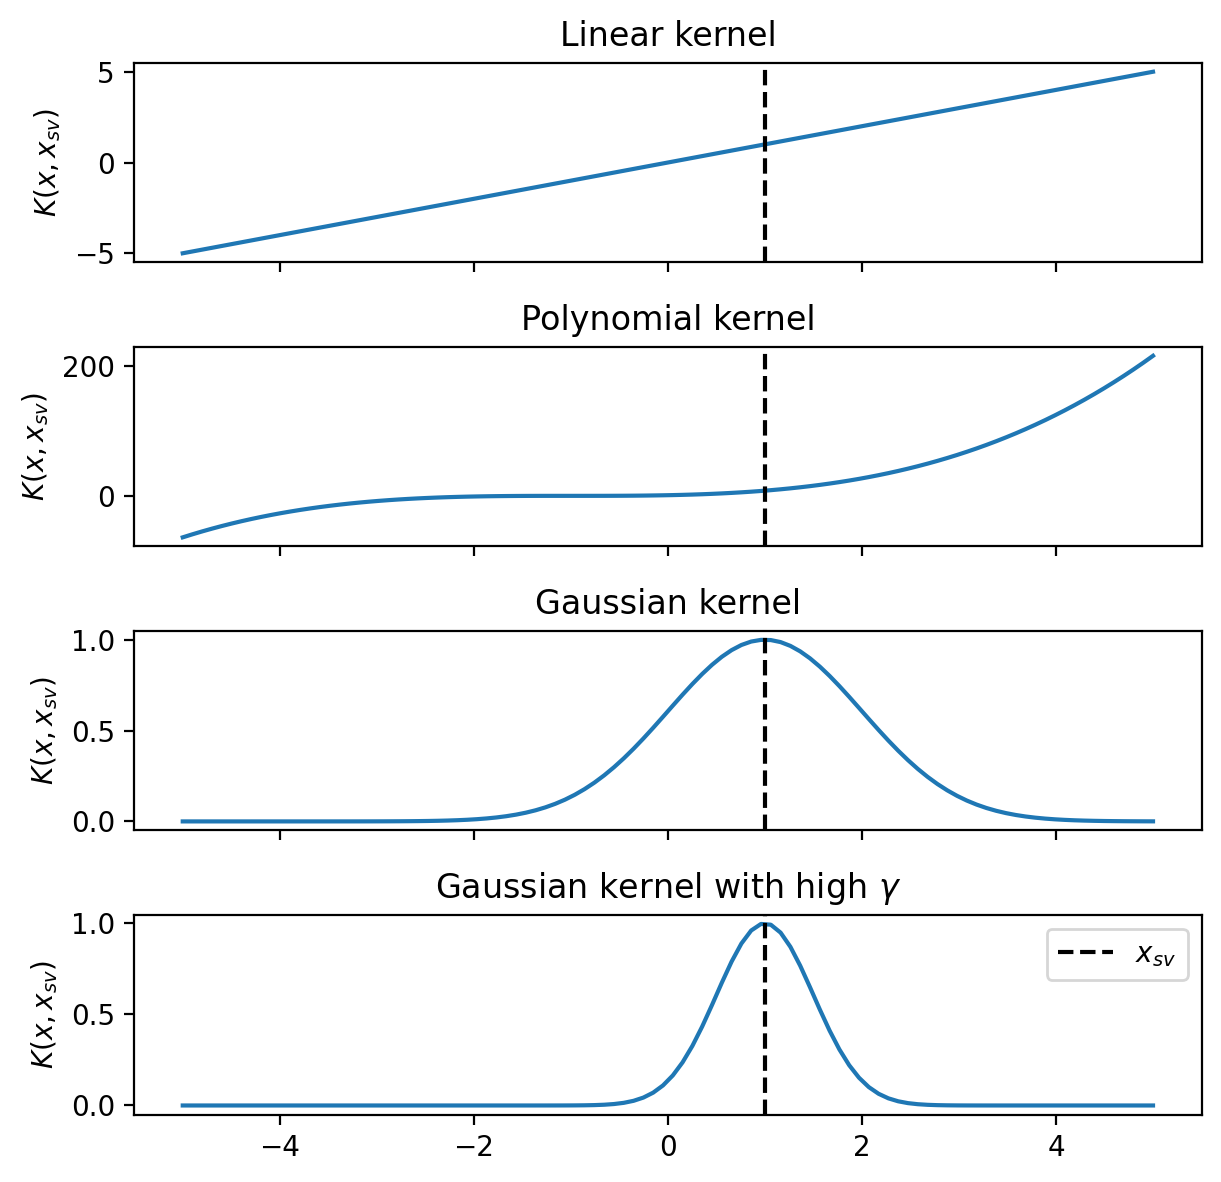

In [129]:
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(6, 6))
ax[0].plot(x_test, K_linear_point)
ax[0].set_title('Linear kernel')
ax[1].plot(x_test, K_polynomial_point)
ax[1].set_title('Polynomial kernel')
ax[2].plot(x_test, K_gaussian_point)
ax[2].set_title('Gaussian kernel')
ax[3].plot(x_test, K_gaussian_high_gamma_point)
ax[3].set_title('Gaussian kernel with high $\gamma$')
plt.tight_layout()

for i in range(4):
    ax[i].axvline(x=x_point[0], color='k', linestyle='--', label=r'$x_{sv}$')


plt.legend()

# add ylabel to figure as K(x, x_{sv})
for i in range(4):
    ax[i].set_ylabel(r'$K(x, x_{sv})$')



In [140]:
x = np.linspace(-5, 5, 100)

K_lin = np.array([[linear_kernel(xi, xj) for xi in x] for xj in x])
K_poly = np.array([[polynomial_kernel(xi, xj) for xi in x] for xj in x])
K_gauss = np.array([[gaussian_kernel(xi, xj) for xi in x] for xj in x])


In [141]:
trace_lin = go.Heatmap(z=K_lin, x=x, y=x, colorscale='Viridis', name='Linear Kernel')
fig = go.Figure(data=[trace_lin])
fig.update_layout(title='Linear Kernel', width=500, height=500)
fig.show()

In [24]:
trace_rbf = go.Heatmap(z=K_gauss, x=x, y=x, colorscale='Viridis', name='Gaussian Kernel')
fig = go.Figure(data=[trace_rbf])
fig.update_layout(title='Gaussian Kernel', width=500, height=500)
fig.show()

In [142]:
# Plot 1 row 3 cols for various value of gamma in Gaussian kernel using plotly
gammas = [0.1, 1, 5]

fig = make_subplots(rows=1, cols=len(gammas), subplot_titles=[f'Gamma={gamma}' for gamma in gammas])

for i, gamma in enumerate(gammas, 1):
    K_gauss = np.array([[gaussian_kernel(xi, xj, gamma) for xi in x] for xj in x])
    fig.add_trace(go.Heatmap(z=K_gauss, x=x, y=x, colorscale='Viridis'), row=1, col=i)

fig.update_layout(title_text="Gaussian Kernel Heatmaps for Various Gamma Values")
fig.show()

    

SVC(C=1000000.0, kernel='linear')

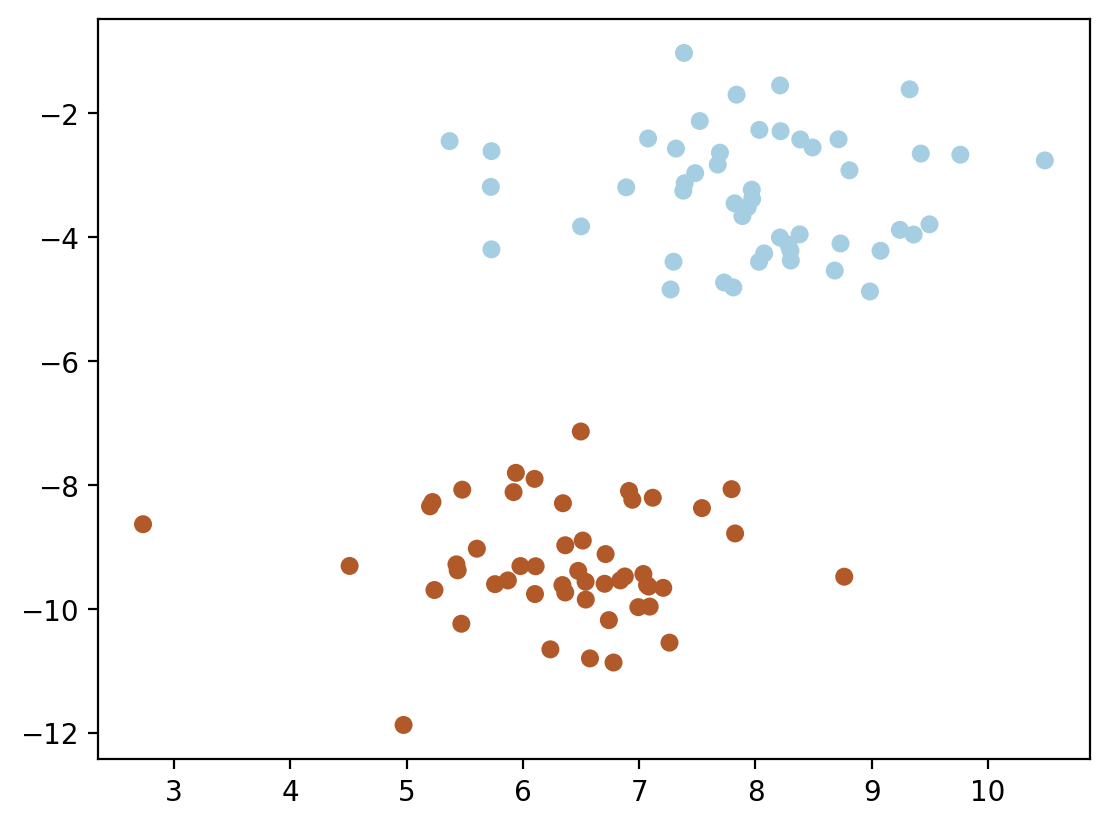

In [143]:
### Understanding how the "similarity" from support vectors to the test point is calculated

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

clf = SVC(kernel='linear', C = 1e6)
clf.fit(X, y)

In [144]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 6.49868019, -7.13530714]])

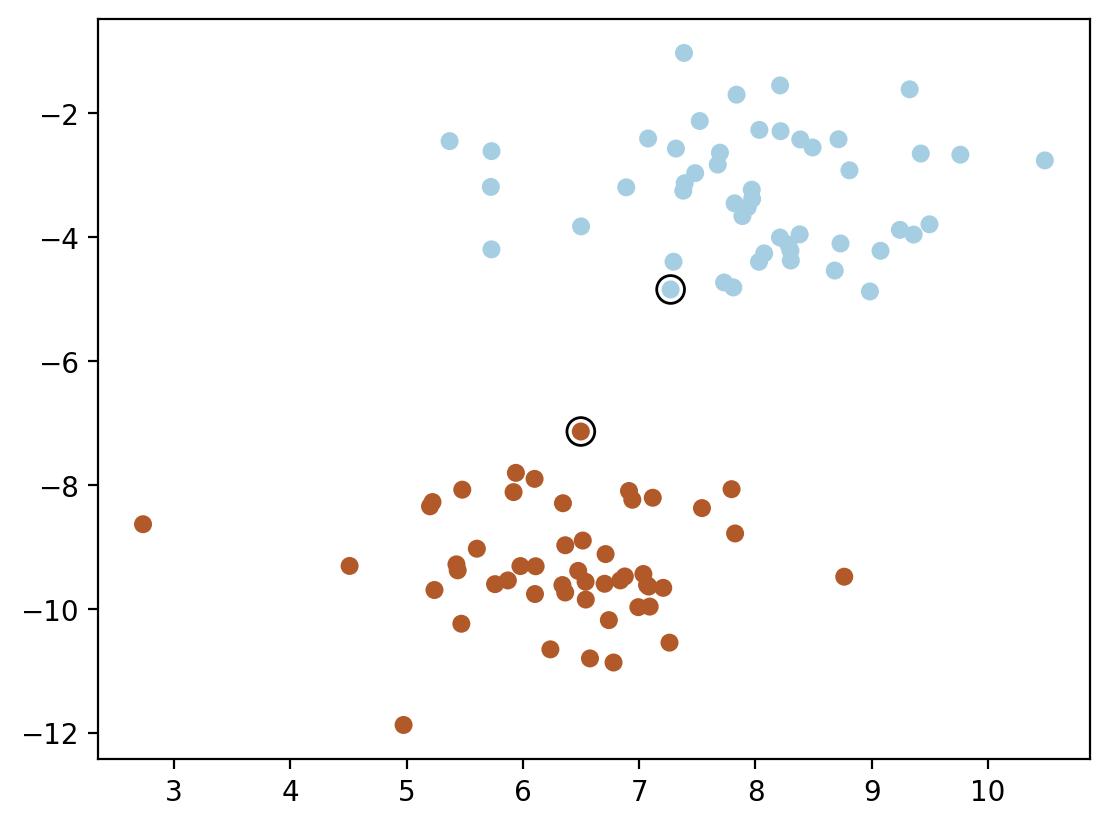

In [145]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot scatter with black edge color for support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

# test point
test_point = np.array([6, -4])

def decision_function_test(clf, test_point):
    decision_function = 0
    print(f"Test point: {test_point}")
    print("---"*20)
    for i in range(len(clf.support_vectors_)):
        print(f"{i}th support vector: {clf.support_vectors_[i]}")
        print(f'alpha_{i} = {alpha[i]}')
        print(f'y_{clf.support_}[{i}] = {y_plus_minus[clf.support_][i]}')
        print(f'K(x_{i}, x_test) = {linear_kernel(clf.support_vectors_[i], test_point[0])}')
        
        out_i = alpha[i] * y_plus_minus[clf.support_][i] * linear_kernel(clf.support_vectors_[i], test_point[0])
        print(f'alpha_{i} * y_{clf.support_}[{i}] * K(x_{i}, x_test) = {out_i}')
        decision_function += out_i
        print("---"*10)
    print(f"b = {clf.intercept_}")
    print(f"Decision function: {decision_function + clf.intercept_} = {decision_function} + {clf.intercept_}")
    decision_function += clf.intercept_
    return decision_function

In [137]:
clf.dual_coef_

array([[-0.341651,  0.341651]])

In [138]:
test_point = np.array([[7.0, -8.0]])

decision_function_test(clf, test_point)

Test point: [[ 7. -8.]]
------------------------------------------------------------
0th support vector: [ 7.27059007 -4.84225716]
alpha_0 = 0.3416510021250007
y_[48 31][0] = -1
K(x_0, x_test) = 89.63218778443229
alpha_0 * y_[48 31][0] * K(x_0, x_test) = -30.62292677920754
------------------------------
1th support vector: [ 6.49868019 -7.13530714]
alpha_1 = 0.3416510021250007
y_[48 31][1] = 1
K(x_1, x_test) = 102.57321844738127
alpha_1 * y_[48 31][1] * K(x_1, x_test) = 35.04424287373442
------------------------------
b = [-2.87610651]
Decision function: [1.54520958] = 4.42131609452688 + [-2.87610651]


array([1.54520958])

In [124]:
clf.decision_function(test_point)

array([1.54520958])